In [40]:
# Description : This Program uses an artificial recurrent neural network called long short term Memory(lstm),
#               to predict the closing stock price of Adani Enterprises using past data.

In [41]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#import lib
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [63]:
#Get The Stock Qoute
msft = yf.Ticker("ADANIENT.NS")
df = msft.history(start='2015-01-01',end='2021-06-02')
#show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-01,70.093391,71.125876,69.400258,70.757645,3946806,0.0,0
2015-01-02,70.945374,71.768471,70.757643,71.104218,6565229,0.0,0
2015-01-05,70.916479,73.147507,70.858718,72.281090,9404837,0.0,0
2015-01-06,71.566301,74.786492,69.920101,71.732361,18412441,0.0,0
2015-01-07,72.201663,73.291908,69.602404,71.096977,10863352,0.0,0
...,...,...,...,...,...,...,...
2021-05-26,1288.094963,1325.969848,1253.418029,1321.922607,5630730,0.0,0
2021-05-27,1328.618029,1341.109737,1303.384779,1324.920532,36690935,0.0,0
2021-05-28,1310.729992,1329.567465,1297.139037,1301.735962,2979585,0.0,0


In [64]:
#size of the data
df.shape

(1581, 7)

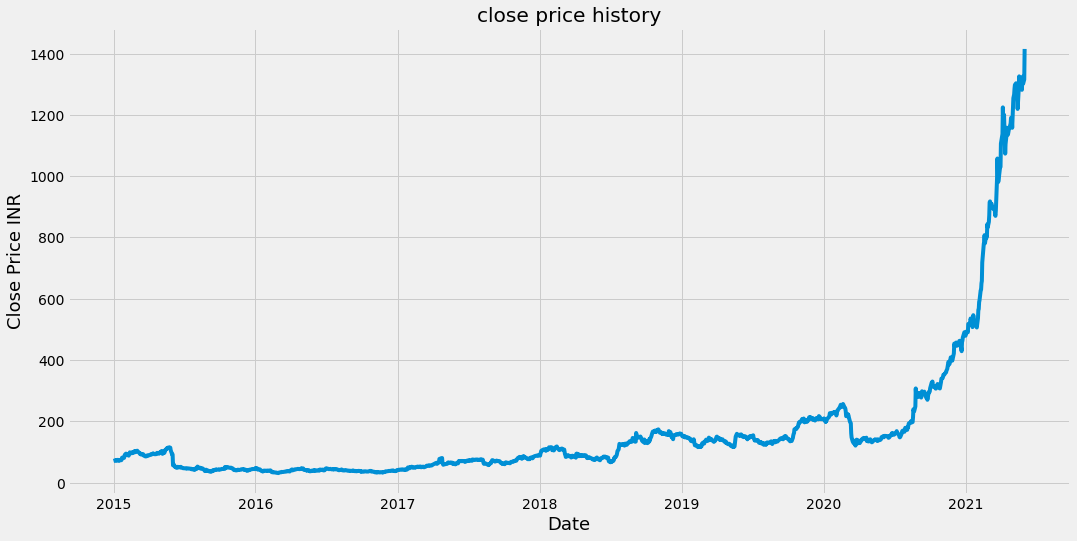

In [65]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [66]:
#create a new data frame with only the 'close column'
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the no. of rows to train the model on LSTM
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1265

In [67]:
#Scale the data 
scaler  = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [68]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()

[array([0.02867794, 0.0289283 , 0.02977849, 0.02938208, 0.02892307,
       0.03094686, 0.03041483, 0.03123896, 0.02937688, 0.02881875,
       0.02981501, 0.02975241, 0.03037833, 0.0303992 , 0.03036268,
       0.03166145, 0.03638187, 0.03611586, 0.03568815, 0.0384213 ,
       0.0430009 , 0.04586966, 0.04449266, 0.0451916 , 0.04253669,
       0.04300611, 0.04111272, 0.04379894, 0.04656861, 0.04895229,
       0.04765352, 0.04672508, 0.04701196, 0.04977641, 0.04927046,
       0.04848286, 0.05185757, 0.05015717, 0.04933827, 0.0517689 ,
       0.05161764, 0.05285903, 0.05103345, 0.0505275 , 0.04701196,
       0.04520724, 0.04523333, 0.04596356, 0.04371026, 0.04432574,
       0.0448317 , 0.04475346, 0.04210899, 0.04118054, 0.03976181,
       0.03926108, 0.04107101, 0.04030947, 0.03965748, 0.04210899])]
[0.04175429347446006]

[array([0.02867794, 0.0289283 , 0.02977849, 0.02938208, 0.02892307,
       0.03094686, 0.03041483, 0.03123896, 0.02937688, 0.02881875,
       0.02981501, 0.02975241, 0.03

In [69]:
#convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)
# print(x_train)

In [70]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1205, 60, 1)

In [71]:
#build the lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,))
model.add(Dense(25))
model.add(Dense(1))


In [72]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [73]:
#Training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1205/1205 [==============================] - 36s 28ms/step - loss: 1.1866e-04


In [74]:
#create the testing data set
#create a new array containing scaled values from index 420 to 600
test_data = scaled_data[training_data_len - 60:,:]
#create  the data set x_test and y_test 
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [75]:
#convert the data to the numpy array
x_test = np.array(x_test)

In [76]:
#Reshaping the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [77]:
#get the models predicted price of values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [78]:
#get the root mean squared errors (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

16.092716893063315

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


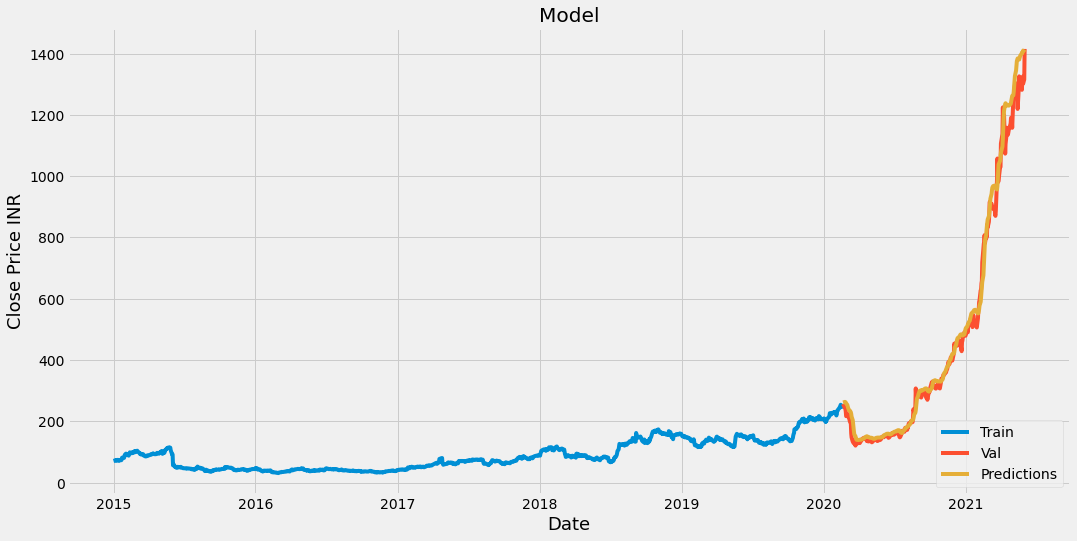

In [79]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc="lower right")
plt.show()

In [80]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2020-02-20,256.601318,261.450531
2020-02-24,245.291595,263.133026
2020-02-25,244.497940,263.397980
2020-02-26,240.876846,262.805817
2020-02-27,232.295364,261.395264
...,...,...
2021-05-26,1321.922607,1402.485840
2021-05-27,1324.920532,1405.243286
2021-05-28,1301.735962,1409.510132


In [81]:
#get the qoute
new_df = data
#get the last 60 days closing price and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the values b/w 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list 
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set into a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get The predicted scale price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1427.316]]
